In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
chunks = pd.read_csv('flights.csv', chunksize=10000)
dfs = [] 
for chunk in chunks:
    df_flights = pd.DataFrame(chunk)
    dfs.append(df_flights)
df = pd.concat(dfs)

In [3]:
pd.set_option('display.max_columns', None)
print(df.head(5)) 
print(df.isnull().sum())
# df.info()
# print(df.describe()) 
df = df.iloc[:, :-6]

   YEAR  MONTH  DAY  DAY_OF_WEEK AIRLINE  FLIGHT_NUMBER TAIL_NUMBER  \
0  2015      1    1            4      AS             98      N407AS   
1  2015      1    1            4      AA           2336      N3KUAA   
2  2015      1    1            4      US            840      N171US   
3  2015      1    1            4      AA            258      N3HYAA   
4  2015      1    1            4      AS            135      N527AS   

  ORIGIN_AIRPORT DESTINATION_AIRPORT  SCHEDULED_DEPARTURE  DEPARTURE_TIME  \
0            ANC                 SEA                    5          2354.0   
1            LAX                 PBI                   10             2.0   
2            SFO                 CLT                   20            18.0   
3            LAX                 MIA                   20            15.0   
4            SEA                 ANC                   25            24.0   

   DEPARTURE_DELAY  TAXI_OUT  WHEELS_OFF  SCHEDULED_TIME  ELAPSED_TIME  \
0            -11.0      21.0        

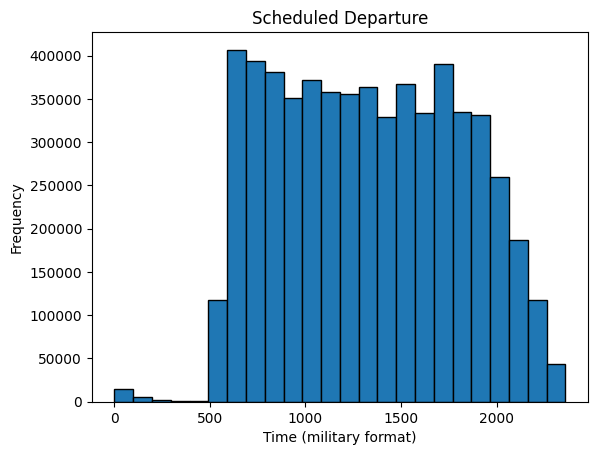

In [4]:
plt.hist(df['SCHEDULED_DEPARTURE'], bins=24, edgecolor='black')
plt.xlabel('Time (military format)')
plt.ylabel('Frequency')
plt.title('Scheduled Departure')
plt.show()

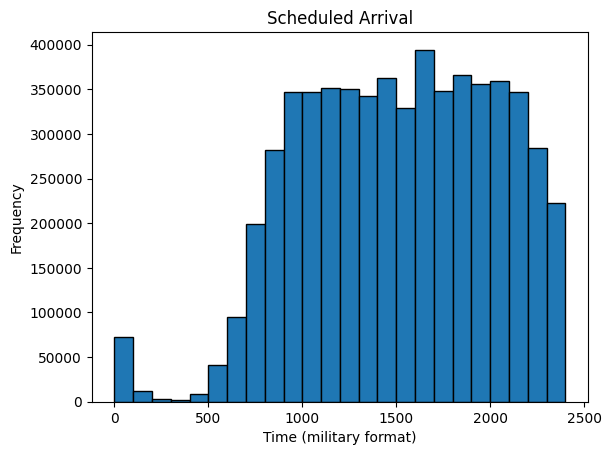

In [5]:
plt.hist(df['SCHEDULED_ARRIVAL'], bins=24, edgecolor='black')
plt.xlabel('Time (military format)')
plt.ylabel('Frequency')
plt.title('Scheduled Arrival')
plt.show()

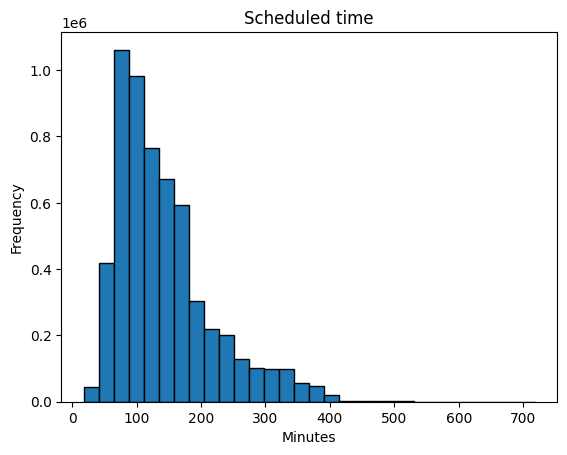

In [6]:
plt.hist(df['SCHEDULED_TIME'], bins=30, edgecolor='black')
plt.xlabel('Minutes')
plt.ylabel('Frequency')
plt.title('Scheduled time')
plt.show()

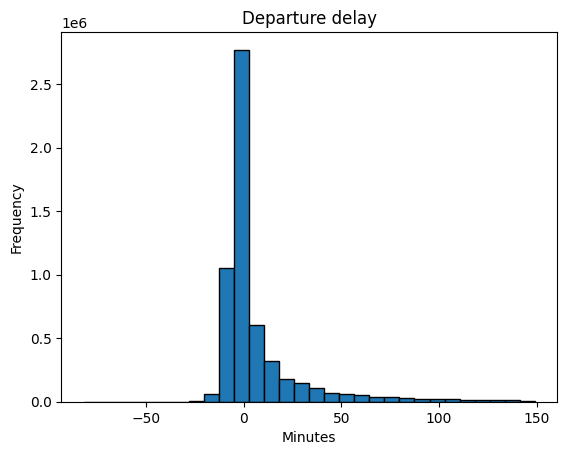

In [7]:
ddelays_woo = df[df['DEPARTURE_DELAY'] < 150] # without outliars
plt.hist(ddelays_woo['DEPARTURE_DELAY'], bins=30, edgecolor='black')
plt.xlabel('Minutes')
plt.ylabel('Frequency')
plt.title('Departure delay')
plt.show()

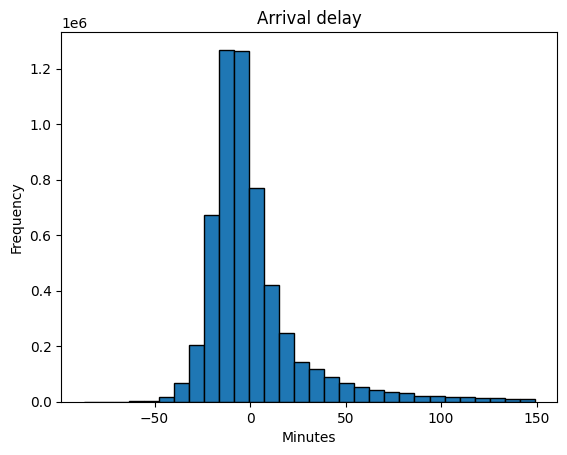

In [8]:
adelays_woo = df[df['ARRIVAL_DELAY'] < 150] # without outliars
plt.hist(adelays_woo['ARRIVAL_DELAY'], bins=30, edgecolor='black')
plt.xlabel('Minutes')
plt.ylabel('Frequency')
plt.title('Arrival delay')
plt.show()

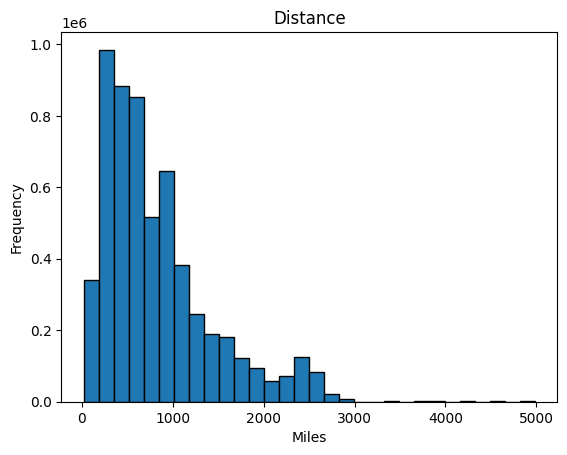

In [9]:
plt.hist(df['DISTANCE'], bins=30, edgecolor='black')
plt.xlabel('Miles')
plt.ylabel('Frequency')
plt.title('Distance')
plt.show()

In [10]:
print('Percentage of flights diverted:', df['DIVERTED'].mean().round(4)*100)
print('Percentage of flights cancelled:', df['CANCELLED'].mean().round(4)*100)

Percentage of flights diverted: 0.26
Percentage of flights cancelled: 1.54


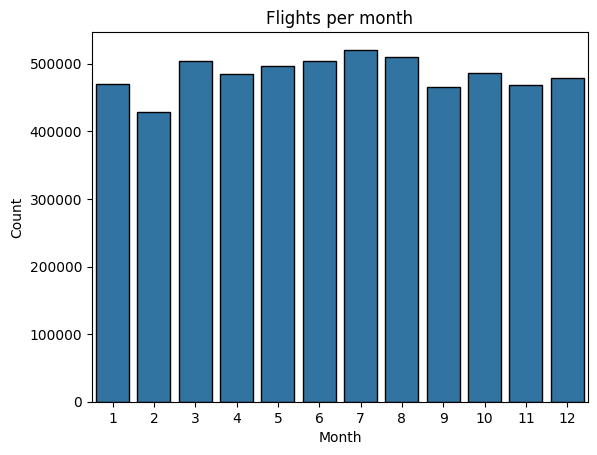

In [11]:
sns.countplot(data=df, x='MONTH', color="#1f77b4", edgecolor='black')
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Flights per month')
plt.show()

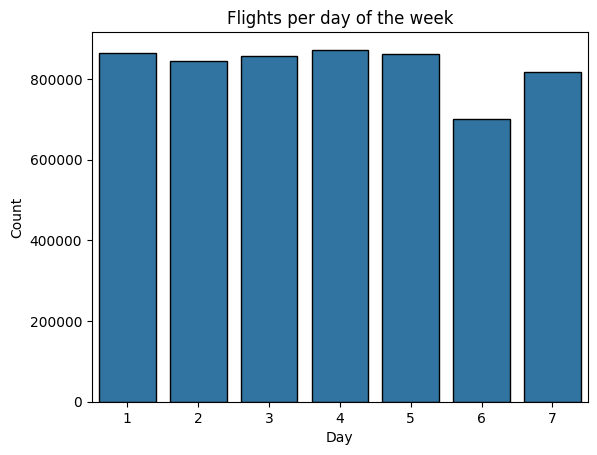

In [12]:
sns.countplot(data=df, x='DAY_OF_WEEK', color="#1f77b4", edgecolor='black')
plt.xlabel('Day')
plt.ylabel('Count')
plt.title('Flights per day of the week')
plt.show()

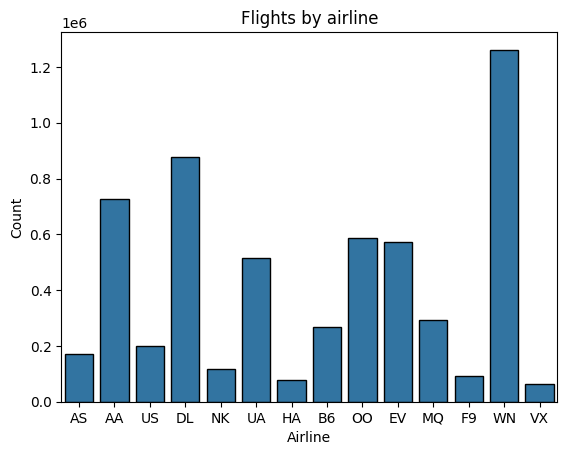

In [13]:
sns.countplot(data=df, x='AIRLINE', color="#1f77b4", edgecolor='black')
plt.xlabel('Airline')
plt.ylabel('Count')
plt.title('Flights by airline')
plt.show()

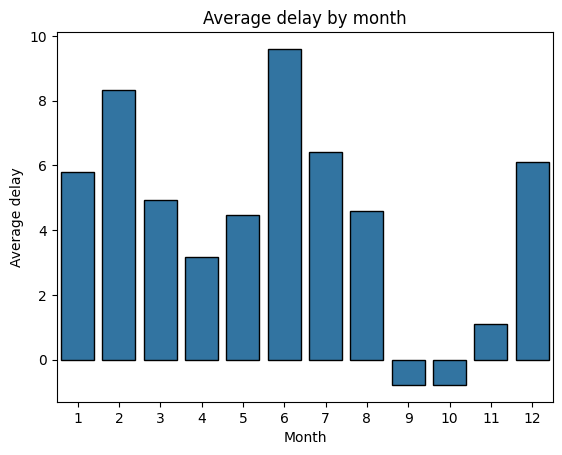

In [14]:
months_delays = df.groupby('MONTH')['ARRIVAL_DELAY'].mean().reset_index()
sns.barplot(data=months_delays, x='MONTH', y='ARRIVAL_DELAY', color="#1f77b4", edgecolor='black')
plt.xlabel('Month')
plt.ylabel('Average delay')
plt.title('Average delay by month')
plt.show()

# there seem to be a higher average delay on months when there is a higher amount of flights

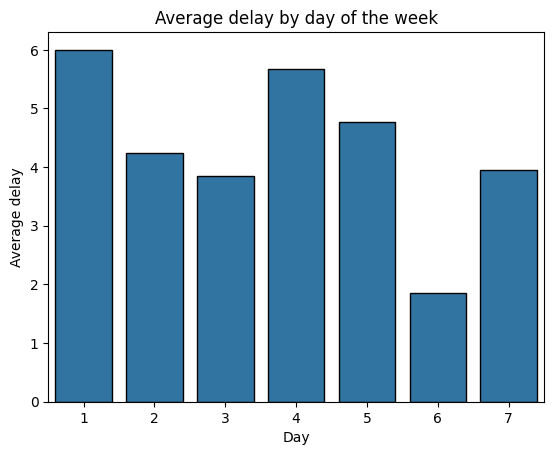

In [18]:
days_delays = df.groupby('DAY_OF_WEEK')['ARRIVAL_DELAY'].mean().reset_index()
sns.barplot(data=days_delays, x='DAY_OF_WEEK', y='ARRIVAL_DELAY', color="#1f77b4", edgecolor='black')
plt.xlabel('Day')
plt.ylabel('Average delay')
plt.title('Average delay by day of the week')
plt.show()

# there seem to be a higher average delay on days when there is a higher amount of flights

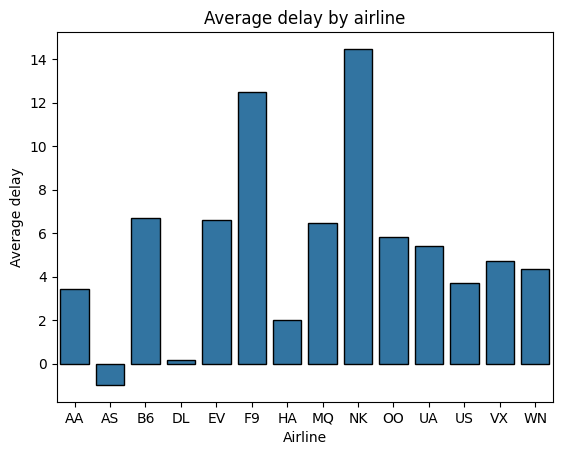

In [16]:
airline_delays = df.groupby('AIRLINE')['ARRIVAL_DELAY'].mean().reset_index()
sns.barplot(data=airline_delays, x='AIRLINE', y='ARRIVAL_DELAY', color="#1f77b4", edgecolor='black')
plt.xlabel('Airline')
plt.ylabel('Average delay')
plt.title('Average delay by airline')
plt.show()

In [17]:
df[['ARRIVAL_DELAY', 'SCHEDULED_DEPARTURE', 'SCHEDULED_ARRIVAL']].corr()

# weak positive correlation between delay and scheduled departure/arrival (perhaps because delays accumulate during the day)

,ARRIVAL_DELAY,SCHEDULED_DEPARTURE,SCHEDULED_ARRIVAL
ARRIVAL_DELAY,1.000000,0.100220,0.088824
SCHEDULED_DEPARTURE,0.100220,1.000000,0.706237
SCHEDULED_ARRIVAL,0.088824,0.706237,1.000000
